<a href="https://colab.research.google.com/github/Concordia-Wisconsin-Ann-Arbor/BusinessAnalytics/blob/main/BusinessAnalystTutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Business Analyst Jobs Tutorial <br>
Concordia University Wisconsin/Ann-Arbor<br>
Professor John Fields <br>
25 Apr 2021 <br>

**RESEARCH QUESTION - What business analyst jobs are available in the Wisconsin/Michigan and what is the salary by location?**

OSEMIn METHODOLOGY<br>
Step 1 - OBTAIN<br>
Step 2 - SCRUB<br>
Step 3 - EXPLORE<br>
Step 4 - MODEL<br>
Step 5 - INTERPRET<br>
Note: As with most projects, these steps are not sequential in this tutorial.  Prior to Model/Interpret, you often need to obtain additional data.

Code Sources:<br>
https://medium.com/@msalmon00/web-scraping-job-postings-from-indeed-96bd588dcb4b<br>
https://pypi.org/project/jobs-scraper/<br>
https://towardsdatascience.com/data-cleaning-web-scraped-job-data-6c2a2d963cd<br>
https://geopy.readthedocs.io/en/stable/#usage-with-pandas<br>
https://medium.com/@msalmon00/analysis-of-web-scraped-job-data-to-predict-relative-salaries-c7237954184a<br>
https://towardsdatascience.com/geocode-with-python-161ec1e62b89<br>


#Setup the Python environment in Google Colab

In [ ]:
pip install jobs_scraper

  Created wheel for jobs-scraper: filename=jobs_scraper-0.0.10-cp37-none-any.whl size=4849 sha256=fcbcba461e178186f2a9b9c11c10581381096b11c3dca020ca58c75cbf392d0f
  Stored in directory: /root/.cache/pip/wheels/86/dd/7f/7afacdf410d538af509942447b53d3b74b390da2793038d745
Successfully built jobs-scraper


In [ ]:
pip install geopy

In [ ]:
#Import the Python packages we will need for this tutorial
import pandas as pd  # data frame operations
import numpy as np  # arrays and math functions
from jobs_scraper import JobsScraper #scrape jobs data from Indeed
from geopy.geocoders import Nominatim #API to geocode from address to latitude/longitude
from geopy.extra.rate_limiter import RateLimiter #restrict the API data rate
import seaborn as sns #plotting package
import matplotlib.pyplot as plt #visualization library
from sklearn.model_selection import train_test_split #machine learning package

#Import Indeed Wisconsin/Michigan job posting data for keywords "Business Analyst"

##1.0 - OBTAIN

In [ ]:
# Create a new Wisconsin JobsScraper object and specify the country, position, location, pages and time delay.  Scraping should only be done for educational purposes and by including a time delay, you are being respecful of the computing resources at Indeed.  Please also be aware that increasing the pages will increase the amount of time for this code block to run.
scraper = JobsScraper(country="us", position="Business Analyst", location="Wisconsin", pages=50, max_delay=1)
df = scraper.scrape()

Scraping Revenue Management Business Analyst...
Scraping IT Business Development Analyst...
Scraping Business Systems Analyst...
Scraping Business Systems Analyst...
Scraping Business Analyst...
Scraping Business & Reporting Analyst...
Scraping Business Analyst I - La Crosse, WI or Remote Nationwide...
Scraping Business Analyst- Digital Product...
Scraping Sr Business Analyst...
Scraping Business Development Analyst...
Scraping Business Technology Analyst...
Scraping Talent Data Business Analyst...
Scraping Business Process Analyst – Product Selection...
Scraping Business Analyst...
Scraping Business Analyst, Senior...
Scraping Business Analyst...
Scraping Senior Business Reporting Analyst...
Scraping Business Analyst III...
Scraping Business Analyst - REMOTE...
Scraping Lead Business Analyst - SIMS...
Scraping Lead Business Analyst...
Scraping Business Credit Analyst...
Scraping Business Analyst...
Scraping Technical Business Analyst...
Scraping Business Analyst: Digital Asset Managem

In [ ]:
# Create a new Chicago JobsScraper object and specify the country, position, location, pages and time delay.  Scraping should only be done for educational purposes and by including a time delay, you are being respecful of the computing resources at Indeed.  Please also be aware that increasing the pages will increase the amount of time for this code block to run.
scraper2 = JobsScraper(country="us", position="Business Analyst", location="Michigan", pages=50, max_delay=1)
df2 = scraper2.scrape()

Scraping Business Analyst...
Scraping Business Analyst...
Scraping Business Analyst - Remote |LATAM|...
Scraping Business Analyst I...
Scraping IT Programmer Analyst 12 - Business Analyst...
Scraping Entry Level Business Analyst - Corporate Web Services...
Scraping Business Analyst...
Scraping Business Data Analyst...
Scraping Business Analyst Intern - Summer 2021...
Scraping Business Analyst Internship...
Scraping Entry Level Business Analyst...
Scraping Entry Level Business Systems Analyst...
Scraping PRICING MANAGER / BUSINESS ANALYST...
Scraping Business Analyst...
Scraping Senior Business Analyst (Medicaid/Medicare) – (Remote)...
Scraping Business Analyst...
Scraping Business / Systems Analyst...
Scraping Business Analyst...
Scraping Senior Business Analyst (Medicaid/Medicare) – (Remote)...
Scraping Business Analyst...
Scraping PRICING MANAGER / BUSINESS ANALYST...
Scraping IT Programmer Analyst 12 - Business Analyst...
Scraping Entry Level Business Analyst...
Scraping Business An

In [ ]:
df2

,title,location,company,summary,salary,url
0,Business Analyst,"Auburn Hills, MI",iknowvate technologies,"Auburn Hills, Michigan - United States | Poste...",None,https://indeed.com/rc/clk?jk=58ffa9dd124f3b7b&...
1,Business Analyst,"Grand Ledge, MI 48837",Chain-Sys Corporation,Identify business requirements and analyze bus...,None,https://indeed.com/rc/clk?jk=8b82f6c12ed352b0&...
2,Business Analyst - Remote |LATAM|,"Colon, MI",BairesDev,Be responsible for identifying the business ne...,None,https://indeed.com/rc/clk?jk=776e0b28cb404247&...
3,Business Analyst I,"East Lansing, MI 48823",Vertafore,Works with customers to create business use ca...,None,https://indeed.com/rc/clk?jk=bbcca765c77505ba&...
4,IT Programmer Analyst 12 - Business Analyst,"East Lansing, MI 48933",State of Michigan,"As a Senior IT Business Analyst, the employee ...",$28.03 - $40.30 an hour,https://indeed.com/rc/clk?jk=f4f45435e7ca8307&...
...,...,...,...,...,...,...
398,UX Researcher,"Plymouth, MI",Bosch Group,Excellent business knowledge paired with outst...,None,https://indeed.com/rc/clk?jk=76ae16eb31b3c57b&...
399,Senior Technical Analyst- US Customs Operations,"Southfield, MI 48076",Livingston International,Research and verify global trade requirements ...,None,https://indeed.com/company/Livingston-Internat...
401,Business Analyst III - Application Development,"Pontiac, MI 48341",United Wholesale Mortgage,Mortgage discount and area business discounts....,None,https://indeed.com/rc/clk?jk=f2e4acecd6e827b5&...
404,Sr. UX Researcher,"Plymouth, MI",Bosch Group,Excellent business knowledge paired with outst...,None,https://indeed.com/rc/clk?jk=0b06a475afc932e3&...


##1.1 - SCRUB - combine the Wisconsin and Michigan data

In [ ]:
#Combine the Wisconsin and Chicago dataframes
frames = [df, df2]
result = pd.concat(frames)

#Drop the duplicate rows in the data and look at the "shape" (number of rows and columns)
scrape_data = result.drop_duplicates()
scrape_data.reset_index(drop=True, inplace=True)
scrape_data.shape

(552, 6)

In [ ]:
#Create a new dataframe with None in salary column
scrape_data_nosalary = scrape_data[scrape_data['salary'].isnull()]
scrape_data_nosalary['og_salary_period'] = np.nan
scrape_data_nosalary

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,title,location,company,summary,salary,url,og_salary_period
0,Revenue Management Business Analyst,"Green Bay, WI",Schneider,Develop a sound understanding of all current a...,None,https://indeed.com/rc/clk?jk=8629cebe8b134415&...,NaN
2,Business Systems Analyst,"Fond du Lac, WI",J. F. Ahern Co.,Proven success collaborating with stakeholders...,None,https://indeed.com/rc/clk?jk=891b6ccc8301528d&...,NaN
3,Business Systems Analyst,"Appleton, WI 54919",Thrivent,4-6+ years of experience in the business syste...,None,https://indeed.com/rc/clk?jk=e6a2b07c2594c644&...,NaN
4,Business Analyst,"Neenah, WI 54956","J. J. Keller & Associates, Inc.",2+ years of business process/business systems ...,None,https://indeed.com/rc/clk?jk=962010edfdaf384a&...,NaN
5,Business & Reporting Analyst,"Elkhorn, WI 53121",Advia Credit Union,Consult with business units to determine how d...,None,https://indeed.com/rc/clk?jk=cca9c88e993c872b&...,NaN
...,...,...,...,...,...,...,...
547,UX Researcher,"Plymouth, MI",Bosch Group,Excellent business knowledge paired with outst...,None,https://indeed.com/rc/clk?jk=76ae16eb31b3c57b&...,NaN
548,Senior Technical Analyst- US Customs Operations,"Southfield, MI 48076",Livingston International,Research and verify global trade requirements ...,None,https://indeed.com/company/Livingston-Internat...,NaN
549,Business Analyst III - Application Development,"Pontiac, MI 48341",United Wholesale Mortgage,Mortgage discount and area business discounts....,None,https://indeed.com/rc/clk?jk=f2e4acecd6e827b5&...,NaN
550,Sr. UX Researcher,"Plymouth, MI",Bosch Group,Excellent business knowledge paired with outst...,None,https://indeed.com/rc/clk?jk=0b06a475afc932e3&...,NaN


##1.2 - EXPLORE - review the new data frame and count the titles/salary ranges

In [ ]:
#Look at the details of the dataframe we created.
scrape_data

,title,location,company,summary,salary,url
0,Revenue Management Business Analyst,"Green Bay, WI",Schneider,Develop a sound understanding of all current a...,None,https://indeed.com/rc/clk?jk=8629cebe8b134415&...
1,IT Business Development Analyst,"Milwaukee, WI 53226 (Zoo area)",County of Milwaukee,Provide strategic consultancy by understanding...,"$73,769 - $91,028 a year",https://indeed.com/rc/clk?jk=2712b13bebd7744a&...
2,Business Systems Analyst,"Fond du Lac, WI",J. F. Ahern Co.,Proven success collaborating with stakeholders...,None,https://indeed.com/rc/clk?jk=891b6ccc8301528d&...
3,Business Systems Analyst,"Appleton, WI 54919",Thrivent,4-6+ years of experience in the business syste...,None,https://indeed.com/rc/clk?jk=e6a2b07c2594c644&...
4,Business Analyst,"Neenah, WI 54956","J. J. Keller & Associates, Inc.",2+ years of business process/business systems ...,None,https://indeed.com/rc/clk?jk=962010edfdaf384a&...
...,...,...,...,...,...,...
547,UX Researcher,"Plymouth, MI",Bosch Group,Excellent business knowledge paired with outst...,None,https://indeed.com/rc/clk?jk=76ae16eb31b3c57b&...
548,Senior Technical Analyst- US Customs Operations,"Southfield, MI 48076",Livingston International,Research and verify global trade requirements ...,None,https://indeed.com/company/Livingston-Internat...
549,Business Analyst III - Application Development,"Pontiac, MI 48341",United Wholesale Mortgage,Mortgage discount and area business discounts....,None,https://indeed.com/rc/clk?jk=f2e4acecd6e827b5&...
550,Sr. UX Researcher,"Plymouth, MI",Bosch Group,Excellent business knowledge paired with outst...,None,https://indeed.com/rc/clk?jk=0b06a475afc932e3&...


In [ ]:
#Count the values we have in the salary column
scrape_data.salary.value_counts()

$66,725 - $78,500 a year      3
$80,000 - $100,000 a year     2
From $50,000 a year           2
$28.03 - $40.30 an hour       2
From $81,000 a year           2
$20 - $24 an hour             1
$32 - $37 an hour             1
$43 - $60 an hour             1
$50,000 - $70,000 a year      1
$50,000 - $60,000 a year      1
Up to $162,500 a year         1
$20.88 - $33.95 an hour       1
$57,000 - $60,000 a year      1
$11 - $30 an hour             1
From $19 an hour              1
$75,000 - $85,000 a year      1
$47,000 - $55,000 a year      1
$76,960 a year                1
$10 - $12 an hour             1
Up to $70,000 a year          1
$70,000 - $80,000 a year      1
$15 an hour                   1
$60,000 - $80,000 a year      1
$12.00 - $14.50 an hour       1
$18 - $20 an hour             1
$27 - $28 an hour             1
$73,769 - $91,028 a year      1
$101,179 - $131,533 a year    1
$70 an hour                   1
$45,000 - $50,000 a year      1
$38 - $42 an hour             1
$17.30 a

In [ ]:
#Count the values by job title
scrape_data.title.value_counts()

Business Analyst                                        44
Business Systems Analyst                                 9
Senior Business Analyst                                  7
Operations Analyst                                       7
Lead Business Analyst                                    5
                                                        ..
Technical Business Management Analyst                    1
Part-Time Sales Supervisor - Fox River                   1
Operations Systems Analyst                               1
Enterprise Connectivity Business Development Analyst     1
Senior Contingency Operations Plans Analyst              1
Name: title, Length: 412, dtype: int64

##1.3 - SCRUB - split the salary range data and insert the average values in the salary column

In [ ]:
#Additional cleaning of the salary information to make parsing easier —> remove “\n”, “$”, from, From, Up to, and “,”.
scrape_data['salary'] = scrape_data['salary'].str.replace('\n','')
scrape_data['salary'] = scrape_data['salary'].str.replace(',','')
scrape_data['salary'] = scrape_data['salary'].str.replace('$','')
scrape_data['salary'] = scrape_data['salary'].str.replace(' - ','to')
scrape_data['salary'] = scrape_data['salary'].str.replace('from','')
scrape_data['salary'] = scrape_data['salary'].str.replace('From','')
scrape_data['salary'] = scrape_data['salary'].str.replace('Up to','')

In [ ]:
#Create a new column og_salary and if the salary contains information on time period, save the time in the og_salary_period column.
scrape_data['og_salary_period'] = np.nan
scrape_data.loc[scrape_data['salary'].str.contains('year',na=False), 'og_salary_period'] = 'year'
scrape_data.loc[scrape_data['salary'].str.contains('month',na=False), 'og_salary_period'] = 'month'
scrape_data.loc[scrape_data['salary'].str.contains('week',na=False), 'og_salary_period'] = 'week'
scrape_data.loc[scrape_data['salary'].str.contains('day',na=False), 'og_salary_period'] = 'day'
scrape_data.loc[scrape_data['salary'].str.contains('hour',na=False), 'og_salary_period'] = 'hour'

In [ ]:
scrape_data['salary_source'] = np.nan

In [ ]:
scrape_data

,title,location,company,summary,salary,url,og_salary_period,salary_source
0,Revenue Management Business Analyst,"Green Bay, WI",Schneider,Develop a sound understanding of all current a...,None,https://indeed.com/rc/clk?jk=8629cebe8b134415&...,NaN,NaN
1,IT Business Development Analyst,"Milwaukee, WI 53226 (Zoo area)",County of Milwaukee,Provide strategic consultancy by understanding...,73769to91028 a year,https://indeed.com/rc/clk?jk=2712b13bebd7744a&...,year,NaN
2,Business Systems Analyst,"Fond du Lac, WI",J. F. Ahern Co.,Proven success collaborating with stakeholders...,None,https://indeed.com/rc/clk?jk=891b6ccc8301528d&...,NaN,NaN
3,Business Systems Analyst,"Appleton, WI 54919",Thrivent,4-6+ years of experience in the business syste...,None,https://indeed.com/rc/clk?jk=e6a2b07c2594c644&...,NaN,NaN
4,Business Analyst,"Neenah, WI 54956","J. J. Keller & Associates, Inc.",2+ years of business process/business systems ...,None,https://indeed.com/rc/clk?jk=962010edfdaf384a&...,NaN,NaN
...,...,...,...,...,...,...,...,...
547,UX Researcher,"Plymouth, MI",Bosch Group,Excellent business knowledge paired with outst...,None,https://indeed.com/rc/clk?jk=76ae16eb31b3c57b&...,NaN,NaN
548,Senior Technical Analyst- US Customs Operations,"Southfield, MI 48076",Livingston International,Research and verify global trade requirements ...,None,https://indeed.com/company/Livingston-Internat...,NaN,NaN
549,Business Analyst III - Application Development,"Pontiac, MI 48341",United Wholesale Mortgage,Mortgage discount and area business discounts....,None,https://indeed.com/rc/clk?jk=f2e4acecd6e827b5&...,NaN,NaN
550,Sr. UX Researcher,"Plymouth, MI",Bosch Group,Excellent business knowledge paired with outst...,None,https://indeed.com/rc/clk?jk=0b06a475afc932e3&...,NaN,NaN


In [ ]:
#filtering out the results with salary data != “Nothing_found”
salary_data = scrape_data[scrape_data['salary'] != 'Nothing_found']
#removing all rows in salary data from scrape data, and converting #all “Nothing_found” values to NaN, so that float salary values can #be easily reintegrated later
scrape_data = scrape_data[~scrape_data.isin(salary_data)].dropna(how='all')
scrape_data['salary'].replace('Nothing_found',np.nan, inplace=True)
scrape_data['salary'].astype('float')

Series([], Name: salary, dtype: float64)

In [ ]:
#Separating out data based on whether contains hour, day, week, #month, year
year_salaries = salary_data[salary_data['salary'].str.contains('year',na=False)]
month_salaries = salary_data[salary_data['salary'].str.contains('month',na=False)]
week_salaries = salary_data[salary_data['salary'].str.contains('week',na=False)]
day_salaries = salary_data[salary_data['salary'].str.contains('day',na=False)]
hour_salaries = salary_data[salary_data['salary'].str.contains('hour',na=False)]
# # removing string values(“ a year”, “ a week”, etc. from salary dfs)
year_salaries['salary'] = year_salaries['salary'].replace(' a year','',regex=True)
month_salaries['salary'] = month_salaries['salary'].replace(' a month','',regex=True)
week_salaries['salary'] = week_salaries['salary'].replace(' a week','',regex=True)
day_salaries['salary'] = day_salaries['salary'].replace(' a day','',regex=True)
hour_salaries['salary'] = hour_salaries['salary'].replace(' a hour','',regex=True)
hour_salaries['salary'] = hour_salaries['salary'].replace(' an hour','',regex=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

In [ ]:
#Create a function to split the salary range into two fields and average
def split_sal(i):
 try:
   splt = i.split('to',1)
   first = float(splt[0])
   second = float(splt[1])
   return (first + second)/2
 except:
   return float(i)

In [ ]:
#Run the function to split the salary in year, month, week, day and hour quantities.
year_salaries['salary'] = year_salaries['salary'].apply(split_sal)
month_salaries['salary'] = month_salaries['salary'].apply(split_sal)
month_salaries['salary'] = month_salaries['salary'] * 12
week_salaries['salary'] = week_salaries['salary'].apply(split_sal)
week_salaries['salary'] = week_salaries['salary'] * 52
day_salaries['salary'] = day_salaries['salary'].apply(split_sal)
day_salaries['salary'] = day_salaries['salary'] * 260
hour_salaries['salary'] = hour_salaries['salary'].apply(split_sal)
hour_salaries['salary'] = hour_salaries['salary'] * 2080

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

In [ ]:
#Combine the salary data into main scrape_data df
combined_salaries = pd.concat([year_salaries, month_salaries, week_salaries, day_salaries, hour_salaries], axis=0)
scrape_data = pd.concat([scrape_data, combined_salaries], axis=0)

##1.4 - EXPLORE - confirm the salary column has average annual values in float format

In [ ]:
#We now have the salary data as a float format and standardized as an annual value.
scrape_data

,title,location,company,summary,salary,url,og_salary_period,salary_source
1,IT Business Development Analyst,"Milwaukee, WI 53226 (Zoo area)",County of Milwaukee,Provide strategic consultancy by understanding...,82398.5,https://indeed.com/rc/clk?jk=2712b13bebd7744a&...,year,Indeed
50,Small Business Credit Analyst 4 - Telecommute,"Brookfield, WI",U.S. Bank,"At U.S. Bank, we're passionate about helping c...",72612.5,https://indeed.com/rc/clk?jk=533769a49e17015c&...,year,Indeed
51,Data Scientist II,Wisconsin,American Family Insurance,Translate business needs into viable analytica...,162500.0,https://indeed.com/rc/clk?jk=31d08bff81a54ff3&...,year,Indeed
78,"Small Business Credit Analyst 4 - Brookfield, ...","Brookfield, WI",U.S. Bank,Responsible for approving the extension of cre...,72612.5,https://indeed.com/rc/clk?jk=d2e14af3a1cda5e0&...,year,Indeed
88,Small Business Credit Analyst 4 - Telecommute,"Brookfield, WI",U.S. Bank,Responsible for approving the extension of cre...,72612.5,https://indeed.com/rc/clk?jk=533769a49e17015c&...,year,Indeed
99,Project Manager - Business Analyst,"Milwaukee, WI 53203 (Kilbourn Town area)",Milwaukee Area Technical College,"Under the direction of the Director, IT Strate...",71000.0,https://indeed.com/rc/clk?jk=89476c92c074dbab&...,year,Indeed
180,Sr. Business Analyst,"Milwaukee, WI 53208 (Walnut Hill area)",Comcentia,Experienced with business process re-engineeri...,90000.0,https://indeed.com/company/Comcentia/jobs/Seni...,year,Indeed
183,Business Analyst,"Milwaukee, WI",Catholic Charities,This role will evaluate current business syste...,51000.0,https://indeed.com/rc/clk?jk=db9e38eddd315182&...,year,Indeed
187,Business Development and Systems Analyst,"Green Bay, WI 54302 (Three Corners area)",Credit Management Control,Seek out opportunities for expansion and growt...,47500.0,https://indeed.com/company/Credit-Management-C...,year,Indeed
189,Senior Business Analyst - ERP Implementation,"Milwaukee, WI 53208 (Walnut Hill area)",Comcentia,Experience with business process reengineering...,90000.0,https://indeed.com/company/Comcentia/jobs/Seni...,year,Indeed


#Add MapQuest latitude/longitude data

##2.0 - OBTAIN

In [ ]:
#Use MapQuest to convert the location information to latitude/longitude
#To sign up for the MapQuest API, go to https://developer.mapquest.com/
geolocator = Nominatim(user_agent="<enter Mapquest user_agent>")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
scrape_data['location'] = scrape_data['location'].apply(geocode)
scrape_data['point'] = scrape_data['location'].apply(lambda loc: tuple(loc.point) if loc else None)
scrape_data[['latitude', 'longitude', 'altitude']] = pd.DataFrame(scrape_data['point'].tolist(), index=scrape_data.index)

In [ ]:
#Use MapQuest to convert the location information to latitude/longitude for no salary
#To sign up for the MapQuest API, go to https://developer.mapquest.com/
geolocator = Nominatim(user_agent="LocationLookup")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
scrape_data_nosalary['location'] = scrape_data_nosalary['location'].apply(geocode)
scrape_data_nosalary['point'] = scrape_data_nosalary['location'].apply(lambda loc: tuple(loc.point) if loc else None)
scrape_data_nosalary[['latitude', 'longitude', 'altitude']] = pd.DataFrame(scrape_data_nosalary['point'].tolist(), index=scrape_data_nosalary.index)

RateLimiter caught an error, retrying (0/2 tries). Called with (*('Auburn Hills, MI 48326',), **{}).
Traceback (most recent call last):
  File "/usr/lib/python3.7/urllib/request.py", line 1350, in do_open
    encode_chunked=req.has_header('Transfer-encoding'))
  File "/usr/lib/python3.7/http/client.py", line 1277, in request
    self._send_request(method, url, body, headers, encode_chunked)
  File "/usr/lib/python3.7/http/client.py", line 1323, in _send_request
    self.endheaders(body, encode_chunked=encode_chunked)
  File "/usr/lib/python3.7/http/client.py", line 1272, in endheaders
    self._send_output(message_body, encode_chunked=encode_chunked)
  File "/usr/lib/python3.7/http/client.py", line 1032, in _send_output
    self.send(msg)
  File "/usr/lib/python3.7/http/client.py", line 972, in send
    self.connect()
  File "/usr/lib/python3.7/http/client.py", line 1439, in connect
    super().connect()
  File "/usr/lib/python3.7/http/client.py", line 944, in connect
    (self.host,se

In [ ]:
scrape_data_nosalary

,title,location,company,summary,salary,url,og_salary_period,point,latitude,longitude,altitude
0,Revenue Management Business Analyst,"(Green Bay, Brown County, Wisconsin, United St...",Schneider,Develop a sound understanding of all current a...,None,https://indeed.com/rc/clk?jk=8629cebe8b134415&...,NaN,"(44.5126379, -88.0125794, 0.0)",44.512638,-88.012579,0.0
2,Business Systems Analyst,"(Fond du Lac, Fond du Lac County, Wisconsin, 5...",J. F. Ahern Co.,Proven success collaborating with stakeholders...,None,https://indeed.com/rc/clk?jk=891b6ccc8301528d&...,NaN,"(43.7748763, -88.4458033, 0.0)",43.774876,-88.445803,0.0
3,Business Systems Analyst,None,Thrivent,4-6+ years of experience in the business syste...,None,https://indeed.com/rc/clk?jk=e6a2b07c2594c644&...,NaN,None,NaN,NaN,NaN
4,Business Analyst,"(Neenah, Winnebago County, Wisconsin, 54956, U...","J. J. Keller & Associates, Inc.",2+ years of business process/business systems ...,None,https://indeed.com/rc/clk?jk=962010edfdaf384a&...,NaN,"(44.1858193, -88.462609, 0.0)",44.185819,-88.462609,0.0
5,Business & Reporting Analyst,"(Elkhorn, Walworth County, Wisconsin, United S...",Advia Credit Union,Consult with business units to determine how d...,None,https://indeed.com/rc/clk?jk=cca9c88e993c872b&...,NaN,"(42.6727927, -88.5445447, 0.0)",42.672793,-88.544545,0.0
...,...,...,...,...,...,...,...,...,...,...,...
547,UX Researcher,"(Plymouth, Hennepin County, Minnesota, United ...",Bosch Group,Excellent business knowledge paired with outst...,None,https://indeed.com/rc/clk?jk=76ae16eb31b3c57b&...,NaN,"(45.0065149, -93.46651, 0.0)",45.006515,-93.466510,0.0
548,Senior Technical Analyst- US Customs Operations,"(Southfield, Oakland County, Michigan, United ...",Livingston International,Research and verify global trade requirements ...,None,https://indeed.com/company/Livingston-Internat...,NaN,"(42.4733689, -83.2218731, 0.0)",42.473369,-83.221873,0.0
549,Business Analyst III - Application Development,"(Pontiac, Oakland County, Michigan, United Sta...",United Wholesale Mortgage,Mortgage discount and area business discounts....,None,https://indeed.com/rc/clk?jk=f2e4acecd6e827b5&...,NaN,"(42.6389216, -83.2910468, 0.0)",42.638922,-83.291047,0.0
550,Sr. UX Researcher,"(Plymouth, Hennepin County, Minnesota, United ...",Bosch Group,Excellent business knowledge paired with outst...,None,https://indeed.com/rc/clk?jk=0b06a475afc932e3&...,NaN,"(45.0065149, -93.46651, 0.0)",45.006515,-93.466510,0.0


##2.1 - EXPLORE - confirm the latitude and longitude data is now in separate columns

In [ ]:
#Confirm that the latitude, longitude and elevation data was added to the dataframe.
scrape_data

,title,location,company,summary,salary,url,og_salary_period,salary_source,point,latitude,longitude,altitude
1,IT Business Development Analyst,"(Milwaukee County Zoo, 10001, West Bluemound R...",County of Milwaukee,Provide strategic consultancy by understanding...,82398.5,https://indeed.com/rc/clk?jk=2712b13bebd7744a&...,year,Indeed,"(43.0309506, -88.04047221224945, 0.0)",43.030951,-88.040472,0.0
50,Small Business Credit Analyst 4 - Telecommute,"(Brookfield, Waukesha County, Wisconsin, Unite...",U.S. Bank,"At U.S. Bank, we're passionate about helping c...",72612.5,https://indeed.com/rc/clk?jk=533769a49e17015c&...,year,Indeed,"(43.0605671, -88.1064787, 0.0)",43.060567,-88.106479,0.0
51,Data Scientist II,"(Wisconsin, United States, (44.4308975, -89.68...",American Family Insurance,Translate business needs into viable analytica...,162500.0,https://indeed.com/rc/clk?jk=31d08bff81a54ff3&...,year,Indeed,"(44.4308975, -89.6884637, 0.0)",44.430898,-89.688464,0.0
78,"Small Business Credit Analyst 4 - Brookfield, ...","(Brookfield, Waukesha County, Wisconsin, Unite...",U.S. Bank,Responsible for approving the extension of cre...,72612.5,https://indeed.com/rc/clk?jk=d2e14af3a1cda5e0&...,year,Indeed,"(43.0605671, -88.1064787, 0.0)",43.060567,-88.106479,0.0
88,Small Business Credit Analyst 4 - Telecommute,"(Brookfield, Waukesha County, Wisconsin, Unite...",U.S. Bank,Responsible for approving the extension of cre...,72612.5,https://indeed.com/rc/clk?jk=533769a49e17015c&...,year,Indeed,"(43.0605671, -88.1064787, 0.0)",43.060567,-88.106479,0.0
99,Project Manager - Business Analyst,None,Milwaukee Area Technical College,"Under the direction of the Director, IT Strate...",71000.0,https://indeed.com/rc/clk?jk=89476c92c074dbab&...,year,Indeed,None,NaN,NaN,NaN
180,Sr. Business Analyst,"(31st & Lloyd Play Area, Walnut Hill, Milwauke...",Comcentia,Experienced with business process re-engineeri...,90000.0,https://indeed.com/company/Comcentia/jobs/Seni...,year,Indeed,"(43.0581235, -87.95271005000001, 0.0)",43.058124,-87.952710,0.0
183,Business Analyst,"(Milwaukee, Milwaukee County, Wisconsin, Unite...",Catholic Charities,This role will evaluate current business syste...,51000.0,https://indeed.com/rc/clk?jk=db9e38eddd315182&...,year,Indeed,"(43.0349931, -87.922497, 0.0)",43.034993,-87.922497,0.0
187,Business Development and Systems Analyst,None,Credit Management Control,Seek out opportunities for expansion and growt...,47500.0,https://indeed.com/company/Credit-Management-C...,year,Indeed,None,NaN,NaN,NaN
189,Senior Business Analyst - ERP Implementation,"(31st & Lloyd Play Area, Walnut Hill, Milwauke...",Comcentia,Experience with business process reengineering...,90000.0,https://indeed.com/company/Comcentia/jobs/Seni...,year,Indeed,"(43.0581235, -87.95271005000001, 0.0)",43.058124,-87.952710,0.0


#Calculate Basic Statistics and Simple Visualizations

 what is the mean and median of our jobs?

In [ ]:
#display plots in the notebook
%matplotlib inline
# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 17

In [ ]:
#what is the median salary? (calculate mean salary, too, for fun)
print("salary median: " + str(scrape_data["salary"].median()))
print("salary mean: " + str(scrape_data["salary"].mean()))
#creating new target variable "above_med_sal" where 0 == below or equal to the median, and 1 == above the median; any postings without salary information will have NaN values for this variable
scrape_data["above_med_sal"] = np.nan
scrape_data.loc[scrape_data["salary"] > scrape_data["salary"].median(), "above_med_sal"] = 1
scrape_data.loc[scrape_data["salary"] <= scrape_data["salary"].median(), "above_med_sal"] = 0
scrape_data.tail()

salary median: 70500.0
salary mean: 69044.07500000001


,title,location,company,summary,salary,url,og_salary_period,salary_source,point,latitude,longitude,altitude,above_med_sal
501,Operations Analyst (Entry-Level),"(Troy, Oakland County, Michigan, United States...",Proctor Loan Protector,The Reporting Administrator works with various...,35984.0,https://indeed.com/rc/clk?jk=e520246c3911ec2f&...,hour,Indeed,"(42.6055893, -83.1499304, 0.0)",42.605589,-83.149930,0.0,0.0
503,Sales and Marketing Analyst,None,Fluresh,Marketing and sales analyst: 2 years (Preferre...,42640.0,https://indeed.com/company/Fluresh/jobs/Sales-...,hour,Indeed,None,NaN,NaN,NaN,0.0
522,Part Time Assistant Manager,"(Clinton Township, Macomb County, Michigan, Un...",Eddie Bauer,O Proven track record of achieving personal sa...,30160.0,https://indeed.com/company/Eddie-Bauer/jobs/As...,hour,Indeed,"(42.58485235, -82.93482447460985, 0.0)",42.584852,-82.934824,0.0,0.0
525,Sales Supervisor Part Time,"(Clinton Township, Macomb County, Michigan, Un...",Eddie Bauer,"Basic reading, writing and business analysis s...",22880.0,https://indeed.com/company/Eddie-Bauer/jobs/Sa...,hour,Indeed,"(42.58485235, -82.93482447460985, 0.0)",42.584852,-82.934824,0.0,0.0
526,Assistant Sales Manager,"(Novi, Oakland County, Michigan, United States...",Eddie Bauer,O Proven track record of achieving personal sa...,27560.0,https://indeed.com/company/Eddie-Bauer/jobs/As...,hour,Indeed,"(42.48059, -83.4754913, 0.0)",42.480590,-83.475491,0.0,0.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


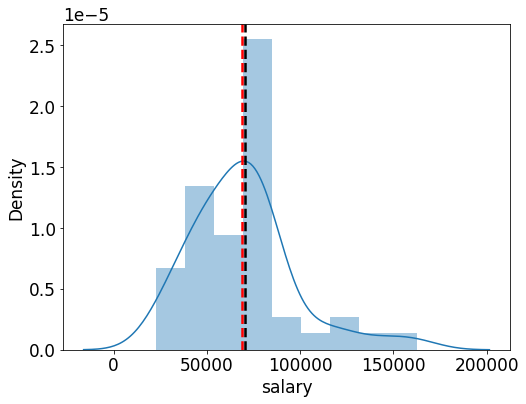

In [ ]:
#plotting salary distribution, with vertical lines to represent the mean and median salary
sal_plot = scrape_data[scrape_data["salary"].notnull()]
ax = sns.distplot(sal_plot["salary"])
ax.axvline(sal_plot["salary"].median(), lw=2.5, ls='dashed', color='black')
ax.axvline(sal_plot["salary"].mean(), lw=2.5, ls='dashed', color='red')
#sns.plt.title('Indeed Salary Distribution with Median (black) and Mean (red)')

#Use the output of this Colab notebook for modeling in DataRobot

In [ ]:
#Add columns to show the source of the salary information
scrape_data_nosalary['salary_source'] = 'Predicted'
scrape_data['salary_source'] = 'Indeed'
scrape_data.drop(['above_med_sal'], axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,title,location,company,summary,salary,url,og_salary_period,salary_source,point,latitude,longitude,altitude
1,IT Business Development Analyst,"(Milwaukee County Zoo, 10001, West Bluemound R...",County of Milwaukee,Provide strategic consultancy by understanding...,82398.5,https://indeed.com/rc/clk?jk=2712b13bebd7744a&...,year,Indeed,"(43.0309506, -88.04047221224945, 0.0)",43.030951,-88.040472,0.0
50,Small Business Credit Analyst 4 - Telecommute,"(Brookfield, Waukesha County, Wisconsin, Unite...",U.S. Bank,"At U.S. Bank, we're passionate about helping c...",72612.5,https://indeed.com/rc/clk?jk=533769a49e17015c&...,year,Indeed,"(43.0605671, -88.1064787, 0.0)",43.060567,-88.106479,0.0
51,Data Scientist II,"(Wisconsin, United States, (44.4308975, -89.68...",American Family Insurance,Translate business needs into viable analytica...,162500.0,https://indeed.com/rc/clk?jk=31d08bff81a54ff3&...,year,Indeed,"(44.4308975, -89.6884637, 0.0)",44.430898,-89.688464,0.0
78,"Small Business Credit Analyst 4 - Brookfield, ...","(Brookfield, Waukesha County, Wisconsin, Unite...",U.S. Bank,Responsible for approving the extension of cre...,72612.5,https://indeed.com/rc/clk?jk=d2e14af3a1cda5e0&...,year,Indeed,"(43.0605671, -88.1064787, 0.0)",43.060567,-88.106479,0.0
88,Small Business Credit Analyst 4 - Telecommute,"(Brookfield, Waukesha County, Wisconsin, Unite...",U.S. Bank,Responsible for approving the extension of cre...,72612.5,https://indeed.com/rc/clk?jk=533769a49e17015c&...,year,Indeed,"(43.0605671, -88.1064787, 0.0)",43.060567,-88.106479,0.0
99,Project Manager - Business Analyst,None,Milwaukee Area Technical College,"Under the direction of the Director, IT Strate...",71000.0,https://indeed.com/rc/clk?jk=89476c92c074dbab&...,year,Indeed,None,NaN,NaN,NaN
180,Sr. Business Analyst,"(31st & Lloyd Play Area, Walnut Hill, Milwauke...",Comcentia,Experienced with business process re-engineeri...,90000.0,https://indeed.com/company/Comcentia/jobs/Seni...,year,Indeed,"(43.0581235, -87.95271005000001, 0.0)",43.058124,-87.952710,0.0
183,Business Analyst,"(Milwaukee, Milwaukee County, Wisconsin, Unite...",Catholic Charities,This role will evaluate current business syste...,51000.0,https://indeed.com/rc/clk?jk=db9e38eddd315182&...,year,Indeed,"(43.0349931, -87.922497, 0.0)",43.034993,-87.922497,0.0
187,Business Development and Systems Analyst,None,Credit Management Control,Seek out opportunities for expansion and growt...,47500.0,https://indeed.com/company/Credit-Management-C...,year,Indeed,None,NaN,NaN,NaN
189,Senior Business Analyst - ERP Implementation,"(31st & Lloyd Play Area, Walnut Hill, Milwauke...",Comcentia,Experience with business process reengineering...,90000.0,https://indeed.com/company/Comcentia/jobs/Seni...,year,Indeed,"(43.0581235, -87.95271005000001, 0.0)",43.058124,-87.952710,0.0


In [ ]:
#Save the scrape_data dateframe to Excel
scrape_data_nosalary.to_excel('IndeedDataNoSalary.xls')

In [ ]:
#Save the scrape_data dateframe to Excel
scrape_data.to_excel('IndeedData.xls')